In [41]:
#Libraries
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import yfinance as yf
import talib as ta


In [42]:
#Timeframea and Dataframe
End_date = datetime.today()
Start_date = End_date - timedelta(days= 365 * 2)
Holding = ['CBA.AX']
for Holding in Holding:
    df = yf.download(Holding, start=Start_date,end=End_date)

[*********************100%%**********************]  1 of 1 completed


In [43]:
#SMA
sma = ta.SMA(df['Adj Close'])

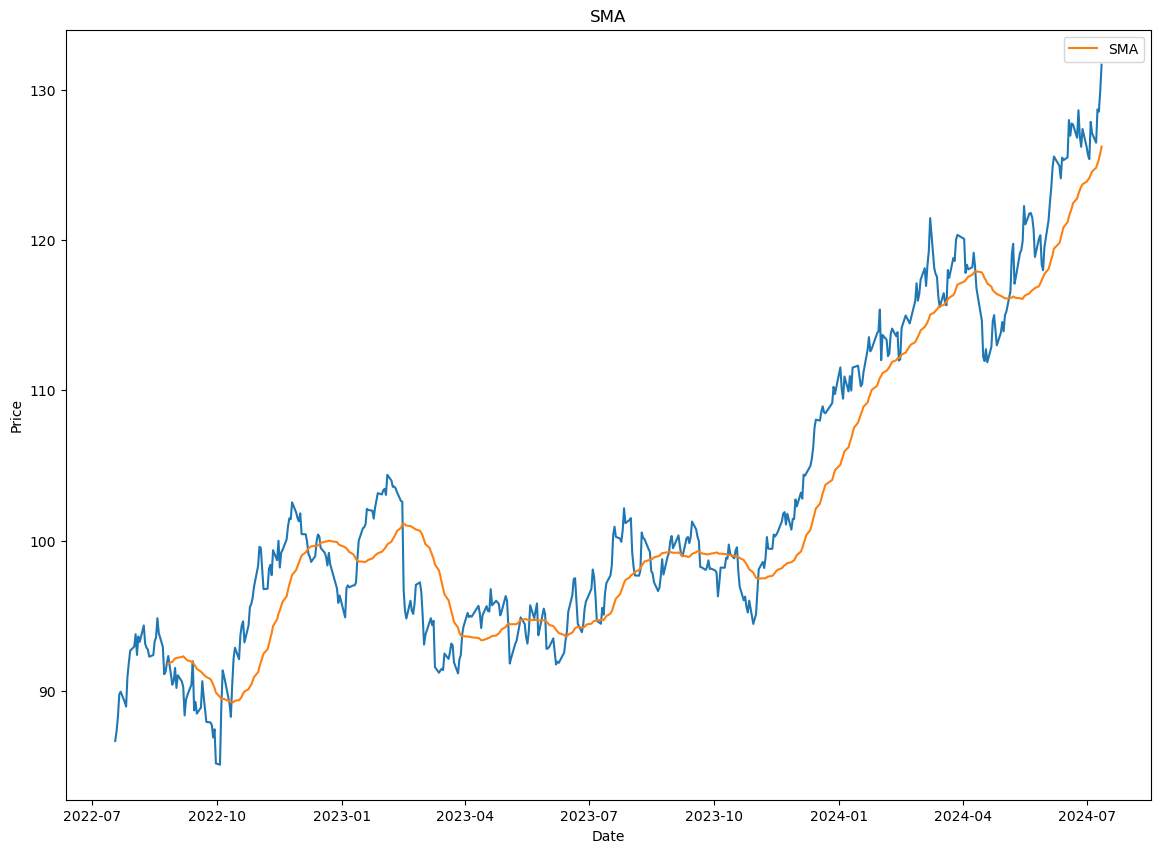

In [44]:
#Plot SMA
plt.figure(figsize=(14,10))
plt.plot(df['Adj Close'])
plt.plot(sma.dropna(), label='SMA')
plt.legend(loc='best')
plt.title('SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [45]:
#RSI
rsi = ta.RSI(df['Adj Close'], timeperiod=14).dropna()
rsi

Date
2022-08-05    77.387303
2022-08-08    79.403707
2022-08-09    71.759713
2022-08-10    70.215631
2022-08-11    69.354637
                ...    
2024-07-08    54.806003
2024-07-09    61.254254
2024-07-10    60.624804
2024-07-11    64.263031
2024-07-12    68.246923
Length: 489, dtype: float64

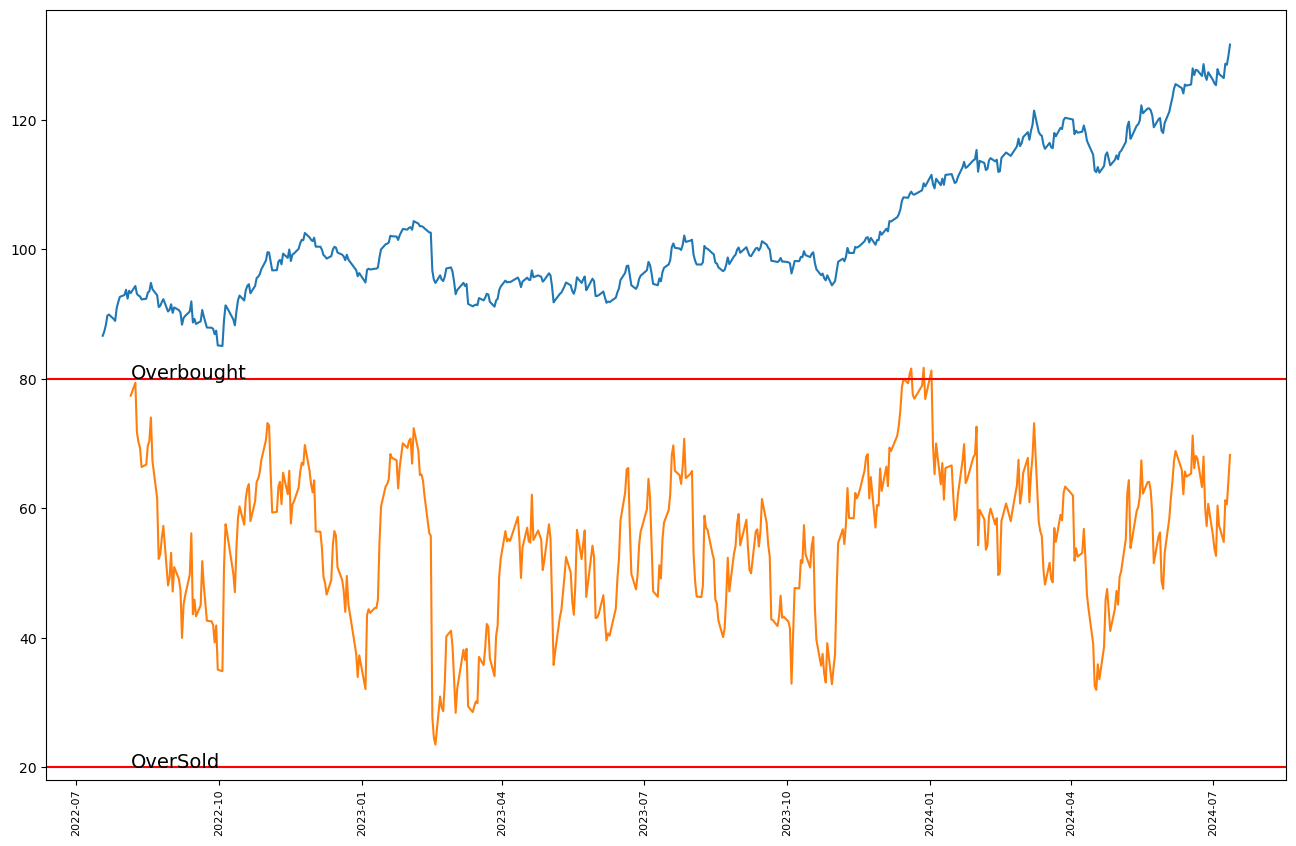

In [46]:
#Plot RSI 
fig, ax = plt.subplots(figsize=(16,10))
plt.plot(df['Adj Close'])
plt.plot(rsi)
ax.axhline(y=80,color='r')
ax.axhline(y=20,color='r')
plt.text(s='Overbought', x=rsi.index[0], y=80, fontsize=14)
plt.text(s='OverSold', x=rsi.index[0], y=20, fontsize=14)

p = plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, fontsize=8)

In [47]:
#MACD
macd, macdsignal, macdhist = ta.MACD(df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)
macd = macd.dropna()
macd

Date
2022-09-01    0.128417
2022-09-02    0.071304
2022-09-05   -0.007214
2022-09-06   -0.098612
2022-09-07   -0.319662
                ...   
2024-07-08    1.237437
2024-07-09    1.318336
2024-07-10    1.354728
2024-07-11    1.477887
2024-07-12    1.696341
Length: 470, dtype: float64

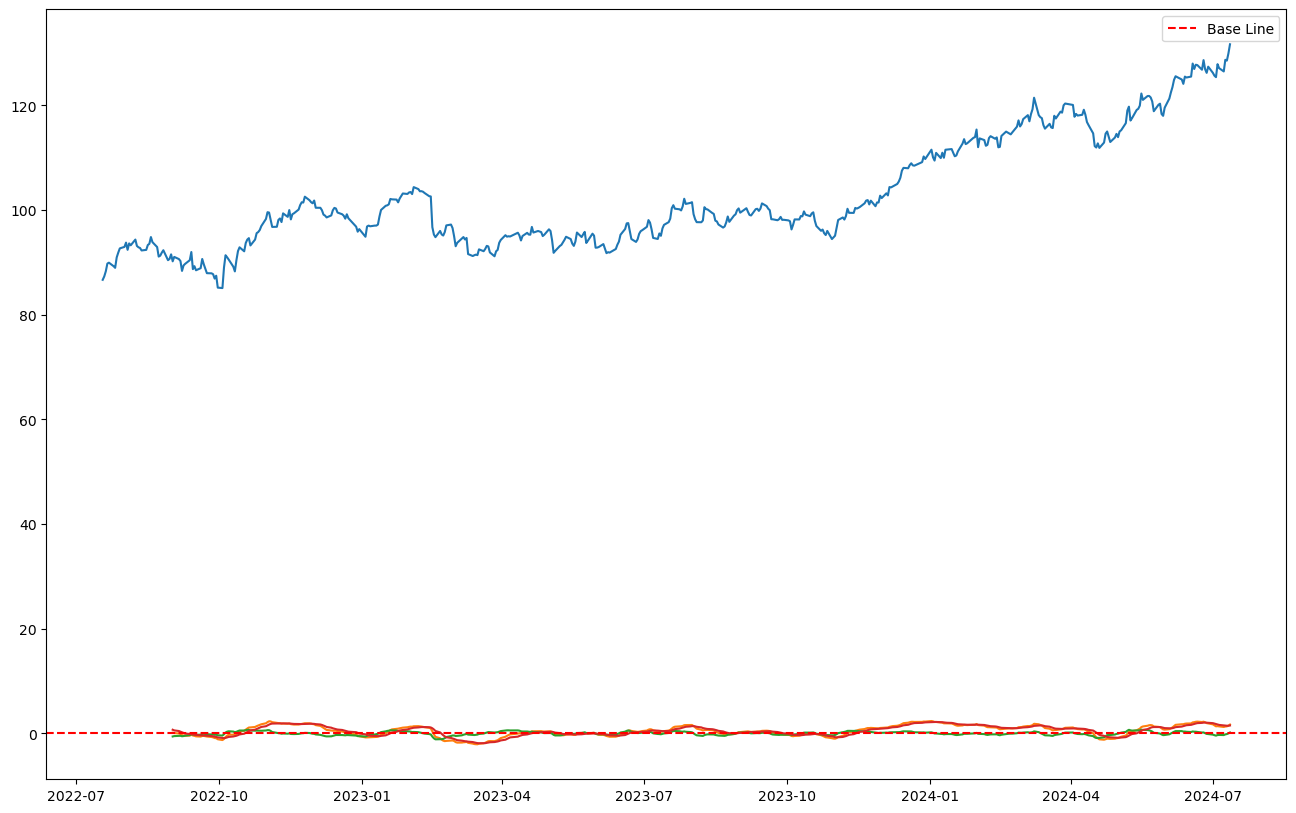

In [48]:
#Plot MACD
fig, ax = plt.subplots(figsize=(16,10))
plt.plot(df['Adj Close'])
plt.plot(macd)
plt.plot(macdhist.dropna())
plt.plot(macdsignal.dropna())
ax.axhline(y=0,color='r', label='Base Line', linestyle='--')
plt.legend()
plt.show()


In [49]:
#OBV
obv = ta.OBV(df['Adj Close'], df['Volume'])
obv

Date
2022-07-18     1849349.0
2022-07-19     3567439.0
2022-07-20     5342816.0
2022-07-21     8003084.0
2022-07-22    12508438.0
                 ...    
2024-07-08    84531690.0
2024-07-09    86313451.0
2024-07-10    85066685.0
2024-07-11    86664739.0
2024-07-12    88630300.0
Length: 503, dtype: float64

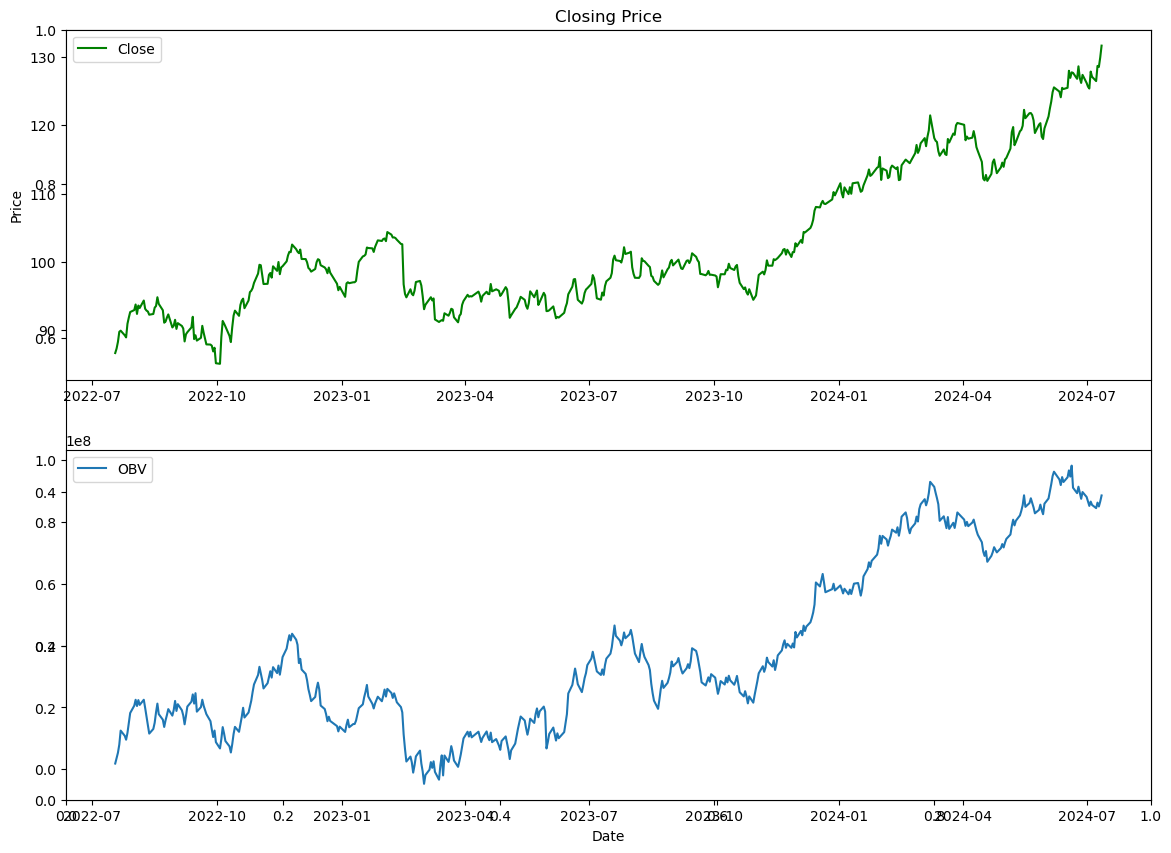

In [50]:
#Plot OBV
plt.subplots(figsize=(14,10))
plt.subplot(2, 1, 1)
plt.plot(df['Adj Close'], color ='g', label='Close')
plt.title('Closing Price')
plt.ylabel('Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(obv, '-', label='OBV')
plt.xlabel('Date')
plt.legend()

plt.show()

In [ ]:
#Multi Plot
